In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_excel('clustering.xlsx')

# Function to clean currency columns (remove "$" and ",")
def clean_currency(column):
    return pd.to_numeric(column.astype(str).str.replace("[$,]", "", regex=True), errors='coerce')

# List of currency-based columns
currency_columns = ["GDP", "Health Exp/Capita", "Tourism Inbound", "Tourism Outbound"]

# Apply the cleaning function
df[currency_columns] = df[currency_columns].apply(clean_currency)

# Display cleaned data info
print(df[currency_columns].info())
print(df[currency_columns].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP                2494 non-null   float64
 1   Health Exp/Capita  2395 non-null   float64
 2   Tourism Inbound    2336 non-null   float64
 3   Tourism Outbound   2233 non-null   float64
dtypes: float64(4)
memory usage: 84.6 KB
None
            GDP  Health Exp/Capita  Tourism Inbound  Tourism Outbound
0  5.479006e+10               60.0      102000000.0       193000000.0
1  9.129595e+09               22.0       34000000.0       146000000.0
2  2.359122e+09               15.0       77000000.0        50000000.0
3  5.788312e+09              152.0      227000000.0       209000000.0
4  2.610959e+09               12.0       23000000.0        30000000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   float64
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [6]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,2395.000000,1416.000000,2444.000000,...,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,801.397077,302.068503,0.032813,...,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,1473.448036,273.299686,0.029968,...,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,0.002000,...,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,50.000000,156.000000,0.009000,...,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,193.000000,239.000000,0.020000,...,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,665.000000,344.750000,0.053000,...,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,9908.000000,2600.000000,0.141000,...,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11


In [7]:
df.head(10)

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,2.610959e+09,0.051,12.0,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0
5,0.042,NaN,301.0,Burundi,NaN,NaN,NaN,8.704861e+08,0.063,7.0,...,47.0,0.0,1,0.490,0.481,0.029,6674286,0.082,1400000.0,14000000.0
6,0.041,NaN,3432.0,Cameroon,NaN,NaN,6310.0,9.287368e+09,0.044,26.0,...,51.0,0.0,1,0.453,0.513,0.034,15927713,0.455,132000000.0,241000000.0
7,0.039,NaN,268.0,Central African Republic,NaN,NaN,NaN,9.145003e+08,0.043,11.0,...,42.0,0.0,1,0.423,0.537,0.040,3638316,0.376,5000000.0,33000000.0
8,0.051,NaN,176.0,Chad,NaN,NaN,NaN,1.385058e+09,0.063,10.0,...,46.0,0.0,1,0.490,0.482,0.028,8301151,0.216,14000000.0,56000000.0
9,0.039,NaN,84.0,Comoros,NaN,NaN,NaN,2.018999e+08,0.035,13.0,...,56.0,NaN,1,0.415,0.554,0.031,528312,0.281,15000000.0,NaN


In [8]:
df.tail(10)

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2694,0.016,34.6%,NaN,St. Lucia,15.0,59.0,NaN,1.318148e+09,0.085,556.0,...,72.0,1.2,1,0.243,0.670,0.087,180870,0.185,3.350000e+08,4.900000e+07
2695,0.016,NaN,NaN,St. Martin (French part),NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,NaN,1,NaN,NaN,NaN,30959,NaN,NaN,NaN
2696,0.017,38.7%,NaN,St. Vincent and the Grenadines,10.0,75.0,NaN,6.944444e+08,0.052,340.0,...,70.0,1.2,1,0.257,0.675,0.068,109373,0.495,9.300000e+07,1.400000e+07
2697,0.018,27.9%,NaN,Suriname,694.0,165.0,NaN,5.012121e+09,0.059,521.0,...,68.0,1.1,1,0.278,0.656,0.066,534541,0.662,7.900000e+07,5.800000e+07
2698,0.015,29.1%,NaN,Trinidad and Tobago,41.0,63.0,NaN,2.343634e+10,0.054,972.0,...,66.0,1.4,1,0.207,0.705,0.088,1337439,0.088,NaN,NaN
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,1.624460e+13,0.179,8895.0,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,5.000435e+10,0.089,1308.0,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,3.812862e+11,0.046,593.0,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09
2703,0.011,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,NaN,1,0.206,0.641,0.152,105275,0.949,NaN,NaN


In [9]:
df.dtypes

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

In [10]:
# Clean "Business Tax Rate" column by removing non-numeric characters and converting to float
df["Business Tax Rate"] = pd.to_numeric(df["Business Tax Rate"].astype(str).str.replace("[%]", "", regex=True), errors='coerce')


In [11]:
df.dtypes

Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   float64
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [13]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create DataFrame and sort in descending order
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

print(missing_df)


                        Missing Values  Percentage
Ease of Business                  2519   93.158284
Hours to do Tax                   1288   47.633136
Business Tax Rate                 1281   47.374260
Days to Start Business             986   36.464497
Energy Usage                       919   33.986686
Lending Interest                   824   30.473373
CO2 Emissions                      579   21.412722
Tourism Outbound                   471   17.418639
Tourism Inbound                    368   13.609467
Health Exp/Capita                  309   11.427515
Health Exp % GDP                   309   11.427515
Infant Mortality Rate              260    9.615385
Population 15-64                   220    8.136095
Population 65+                     220    8.136095
Population 0-14                    220    8.136095
GDP                                210    7.766272
Internet Usage                     173    6.397929
Mobile Phone Usage                 167    6.176036
Life Expectancy Female         

C:\Users\swath\AppData\Local\Temp\ipykernel_24308\3384197024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="rocket")


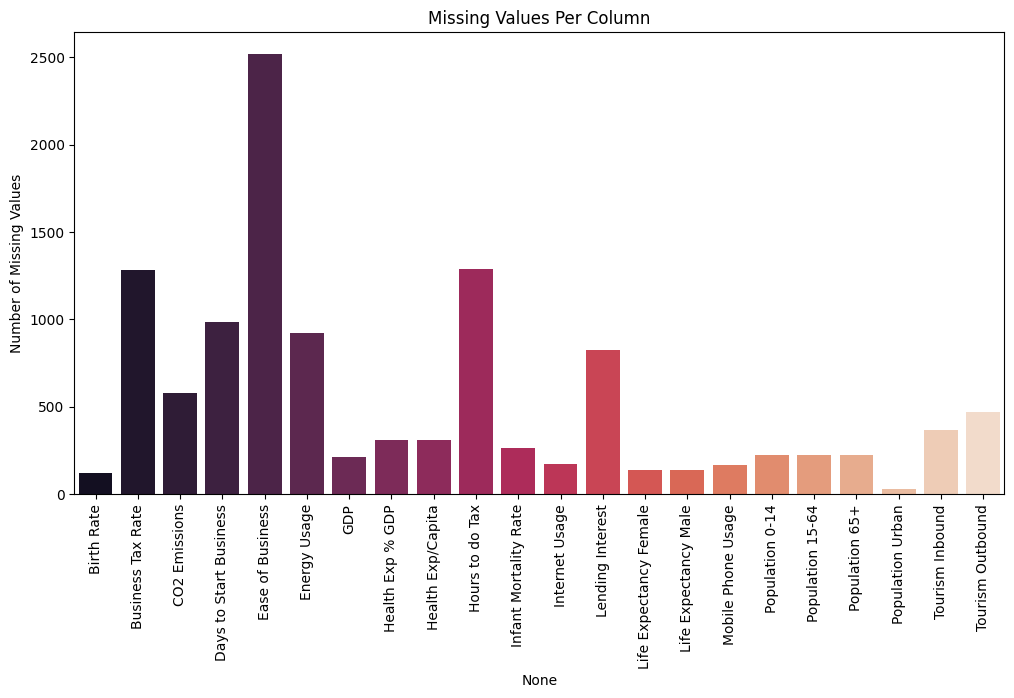

In [14]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="rocket")
plt.xticks(rotation=90)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values Per Column")
plt.show()

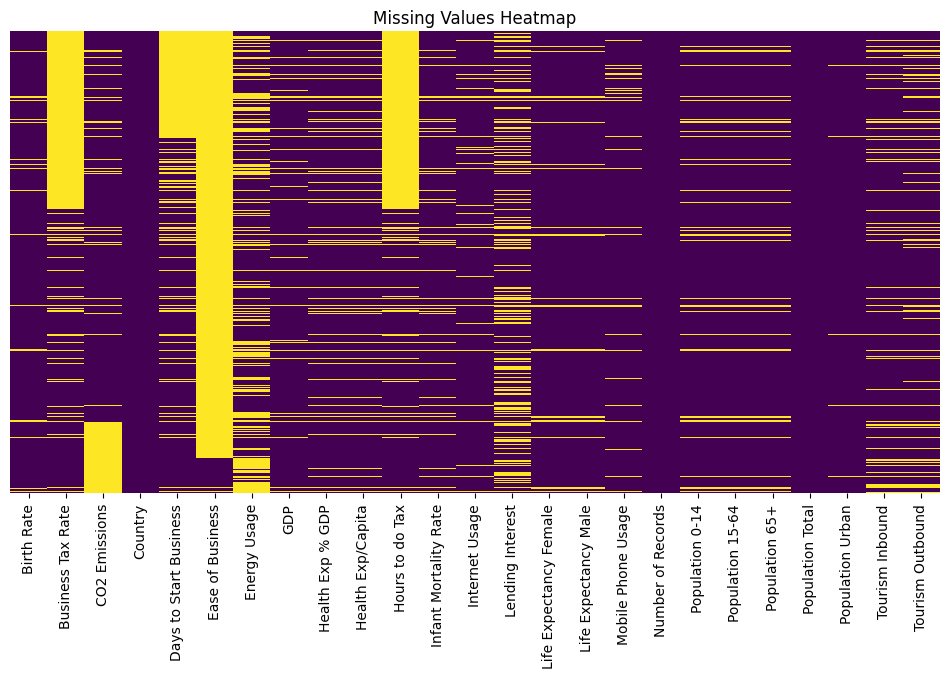

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [16]:
df.drop(columns=['Ease of Business'], inplace=True)

In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample DataFrame with missing values
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset

# Create an imputer object for numeric data, using the 'mean' strategy
numeric_imputer = SimpleImputer(strategy='mean')

# Select only the numeric columns for imputation
numeric_columns = df.select_dtypes(include=['number']).columns

# Impute the numeric columns
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])


In [18]:
# Create an imputer object for categorical data, using the 'most_frequent' strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Select only the categorical columns for imputation
categorical_columns = df.select_dtypes(exclude=['number']).columns

# Impute the categorical columns
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])


In [19]:
df.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [20]:
df.tail(10)

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2694,0.016000,34.600000,142307.107765,St. Lucia,15.000000,7.723684e+04,1.318148e+09,0.08500,556.000000,92.000000,...,72.000000,1.200000,1.0,0.243000,0.670000,0.087000,180870.0,0.185000,3.350000e+08,4.900000e+07
2695,0.016000,48.966901,142307.107765,St. Martin (French part),39.999418,7.723684e+04,2.638540e+11,0.06417,801.397077,302.068503,...,76.000000,0.578124,1.0,0.303051,0.623481,0.073465,30959.0,0.562953,4.939320e+09,4.729435e+09
2696,0.017000,38.700000,142307.107765,St. Vincent and the Grenadines,10.000000,7.723684e+04,6.944444e+08,0.05200,340.000000,111.000000,...,70.000000,1.200000,1.0,0.257000,0.675000,0.068000,109373.0,0.495000,9.300000e+07,1.400000e+07
2697,0.018000,27.900000,142307.107765,Suriname,694.000000,7.723684e+04,5.012121e+09,0.05900,521.000000,199.000000,...,68.000000,1.100000,1.0,0.278000,0.656000,0.066000,534541.0,0.662000,7.900000e+07,5.800000e+07
2698,0.015000,29.100000,142307.107765,Trinidad and Tobago,41.000000,7.723684e+04,2.343634e+10,0.05400,972.000000,210.000000,...,66.000000,1.400000,1.0,0.207000,0.705000,0.088000,1337439.0,0.088000,4.939320e+09,4.729435e+09
2699,0.022715,48.966901,142307.107765,Turks and Caicos Islands,39.999418,7.723684e+04,2.638540e+11,0.06417,801.397077,302.068503,...,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,32427.0,0.911000,4.939320e+09,4.729435e+09
2700,0.013000,46.400000,142307.107765,United States,5.000000,2.132446e+06,1.624460e+13,0.17900,8895.000000,175.000000,...,76.000000,1.000000,1.0,0.196000,0.667000,0.136000,313873685.0,0.811000,2.000920e+11,1.265730e+11
2701,0.015000,41.900000,142307.107765,Uruguay,7.000000,7.723684e+04,5.000435e+10,0.08900,1308.000000,310.000000,...,74.000000,1.500000,1.0,0.220000,0.639000,0.140000,3395253.0,0.948000,2.222000e+09,1.028000e+09
2702,0.020000,61.900000,142307.107765,"Venezuela, RB",144.000000,7.723684e+04,3.812862e+11,0.04600,593.000000,792.000000,...,72.000000,1.000000,1.0,0.288000,0.652000,0.060000,29954782.0,0.889000,9.040000e+08,3.202000e+09
2703,0.011000,48.966901,142307.107765,Virgin Islands (U.S.),39.999418,7.723684e+04,2.638540e+11,0.06417,801.397077,302.068503,...,76.000000,0.578124,1.0,0.206000,0.641000,0.152000,105275.0,0.949000,4.939320e+09,4.729435e+09


In [21]:
# Check for duplicates in the entire dataframe
duplicates = df.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display the rows that are duplicates
print(df[duplicates])


Number of duplicate rows: 0
Empty DataFrame
Columns: [Birth Rate, Business Tax Rate, CO2 Emissions, Country, Days to Start Business, Energy Usage, GDP, Health Exp % GDP, Health Exp/Capita, Hours to do Tax, Infant Mortality Rate, Internet Usage, Lending Interest, Life Expectancy Female, Life Expectancy Male, Mobile Phone Usage, Number of Records, Population 0-14, Population 15-64, Population 65+, Population Total, Population Urban, Tourism Inbound, Tourism Outbound]
Index: []

[0 rows x 24 columns]


In [22]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the IQR for each numeric column
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method (values outside 1.5 * IQR)
outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Count the number of outliers in each column
outlier_count = outliers.sum()

# Display the outlier counts for each numeric column
print("Outliers count in each numeric column:")
print(outlier_count)


Outliers count in each numeric column:
Birth Rate                  0
Business Tax Rate         451
CO2 Emissions             176
Days to Start Business    213
Energy Usage              158
GDP                       238
Health Exp % GDP           58
Health Exp/Capita         317
Hours to do Tax           475
Infant Mortality Rate      49
Internet Usage              0
Lending Interest          245
Life Expectancy Female     14
Life Expectancy Male       11
Mobile Phone Usage         11
Number of Records           0
Population 0-14             0
Population 15-64            9
Population 65+              5
Population Total          318
Population Urban            0
Tourism Inbound           244
Tourism Outbound          225
dtype: int64


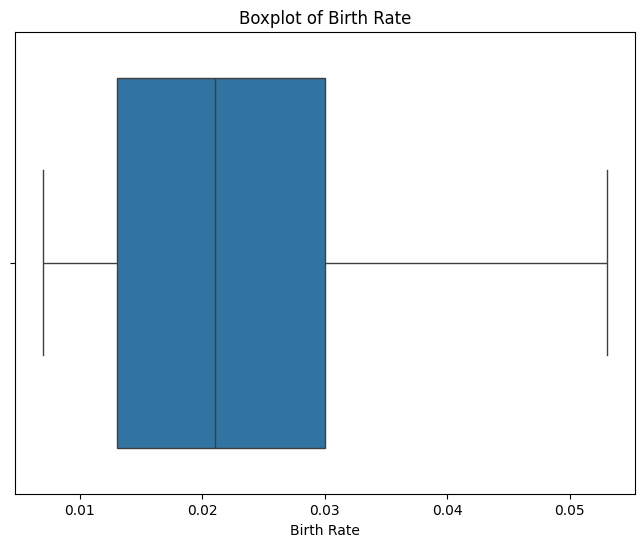

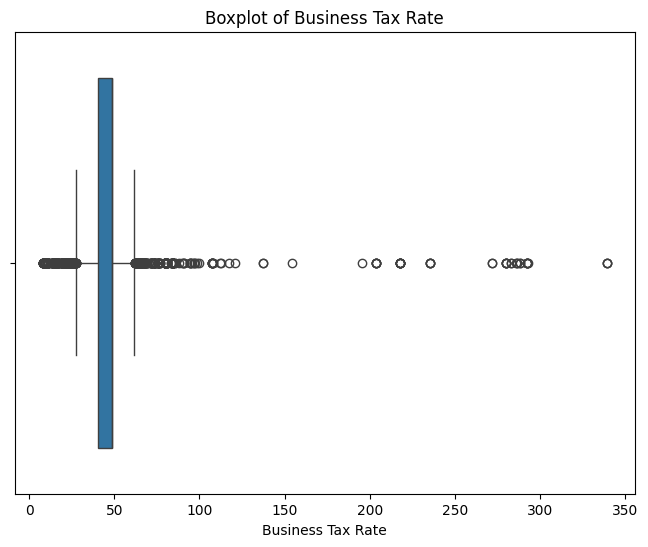

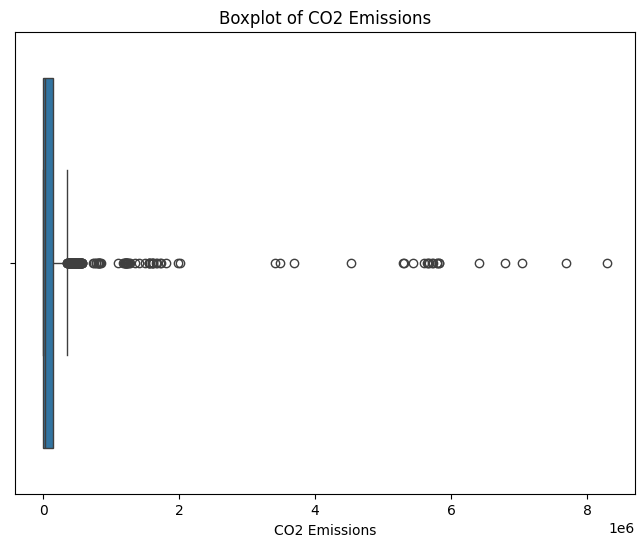

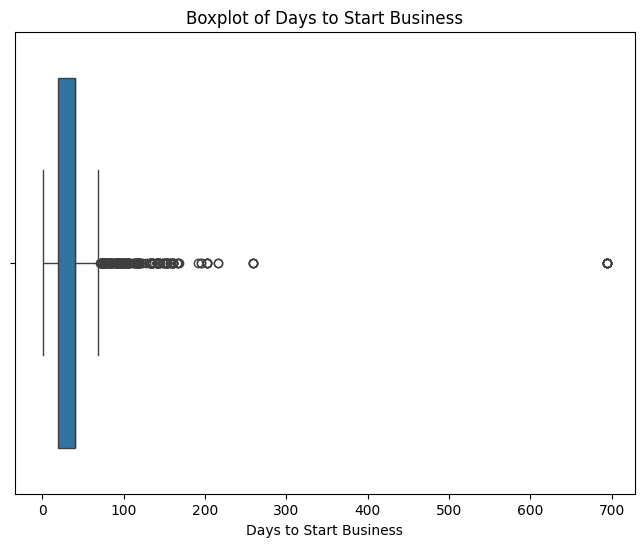

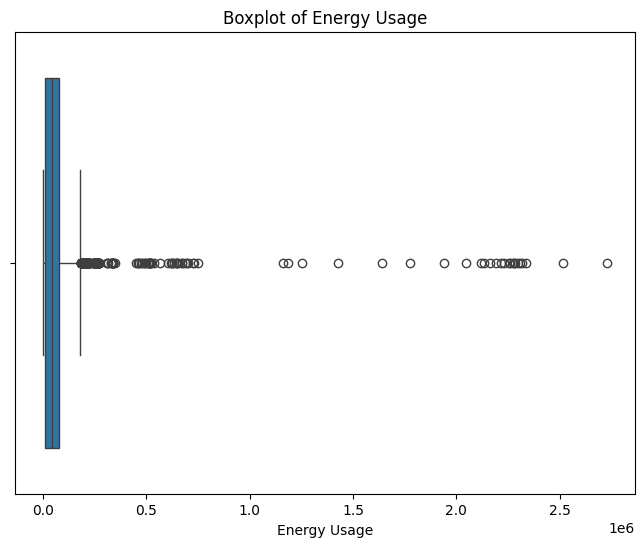

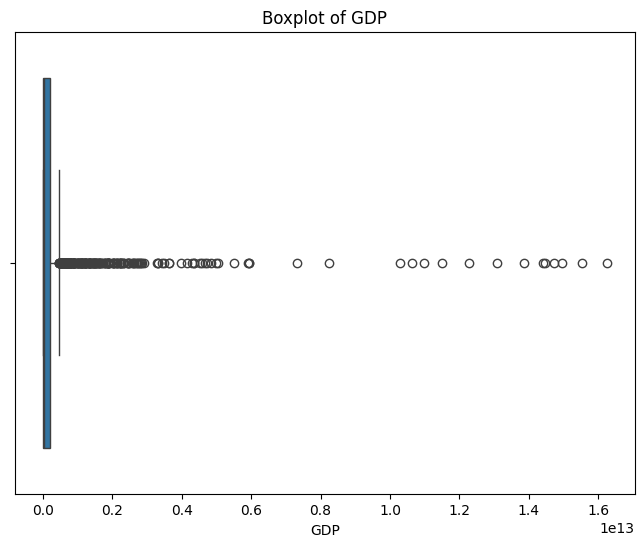

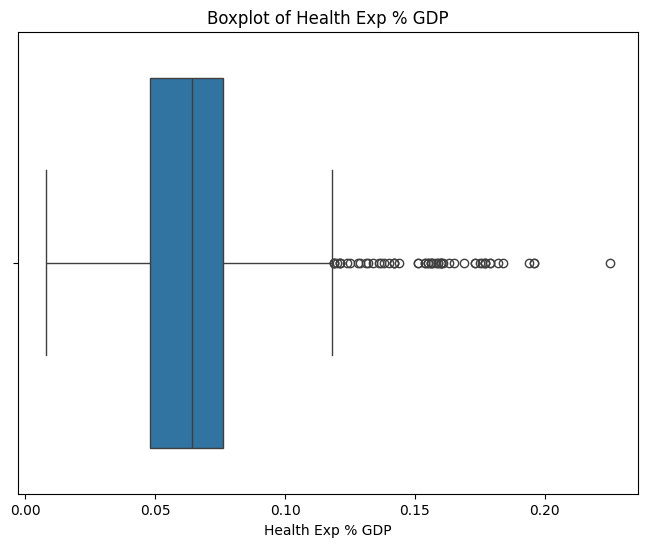

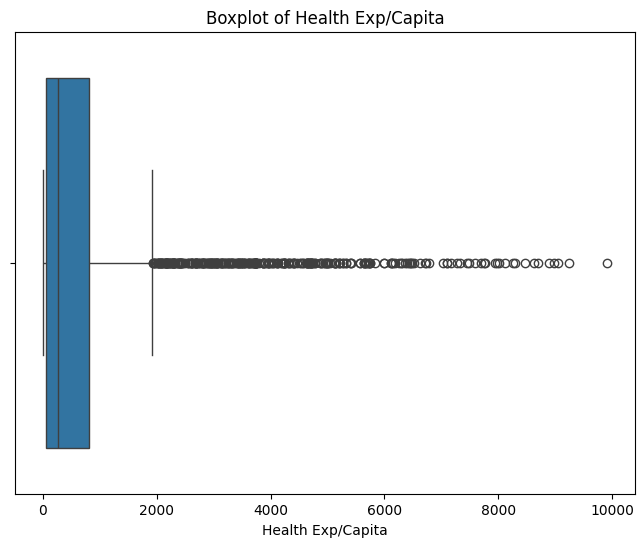

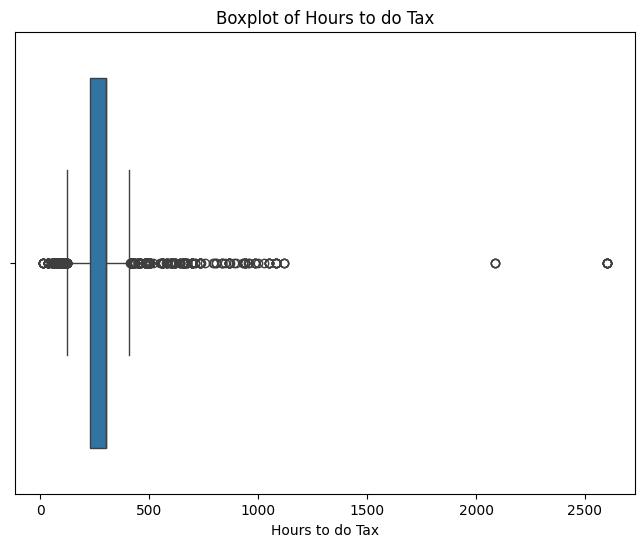

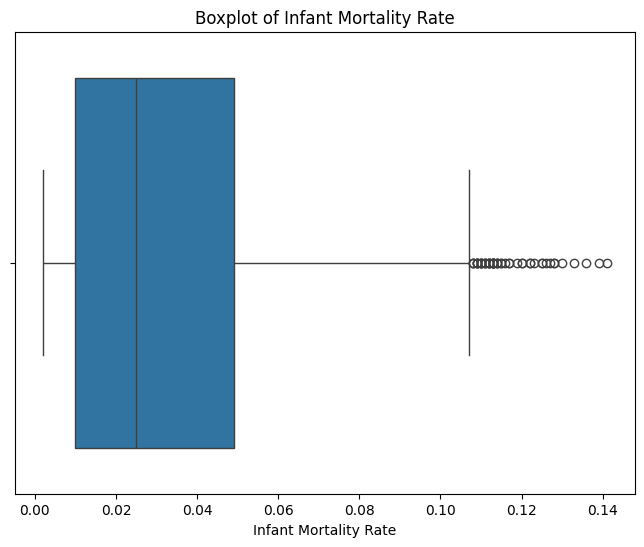

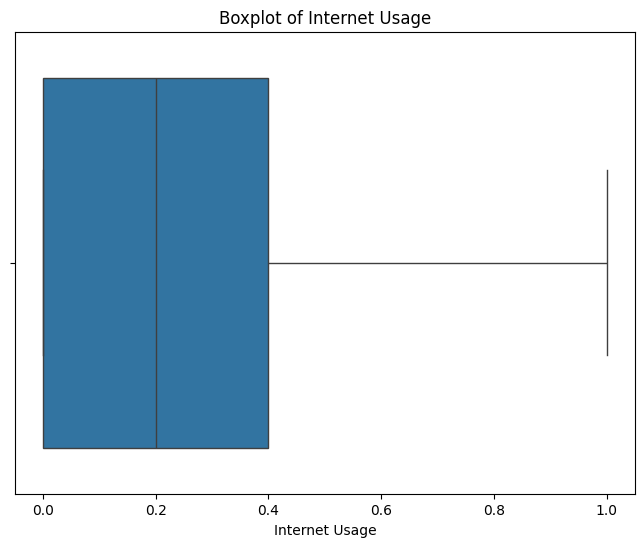

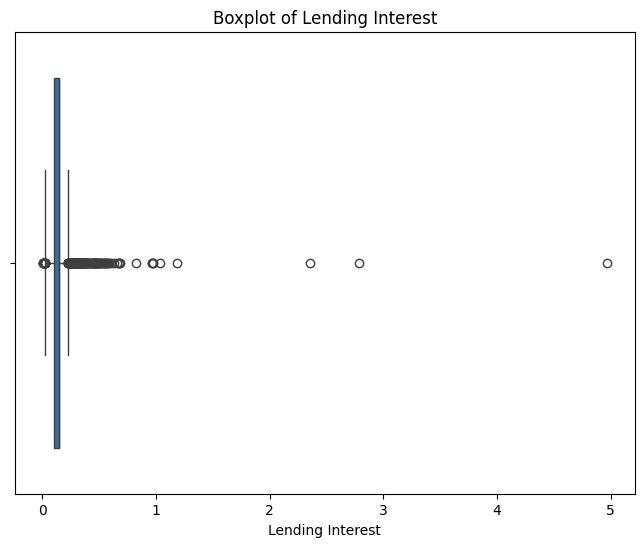

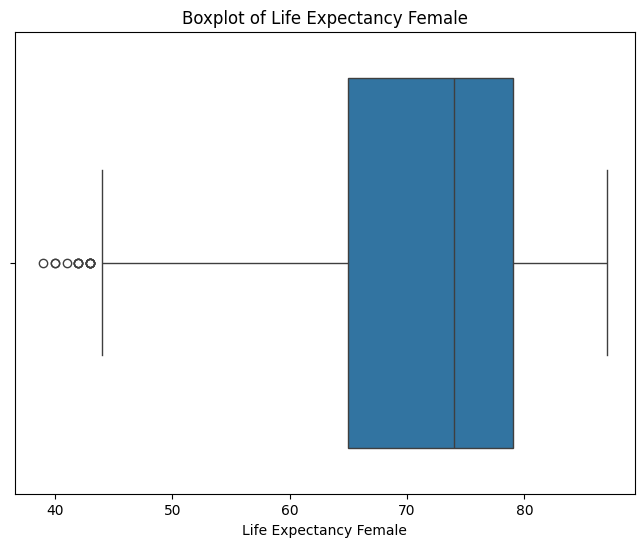

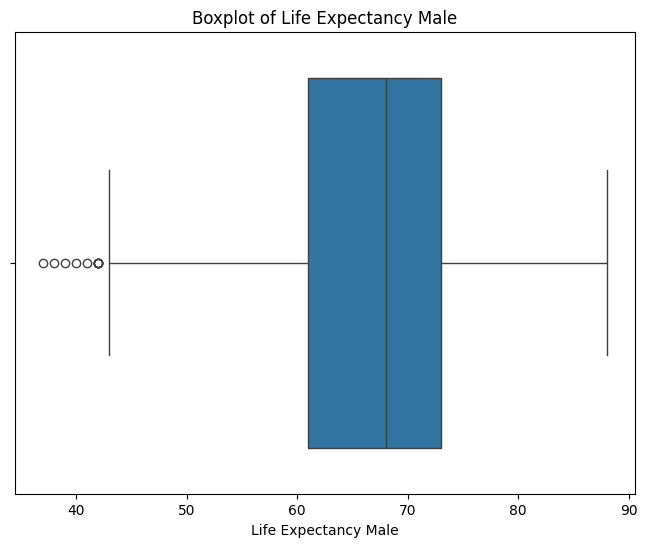

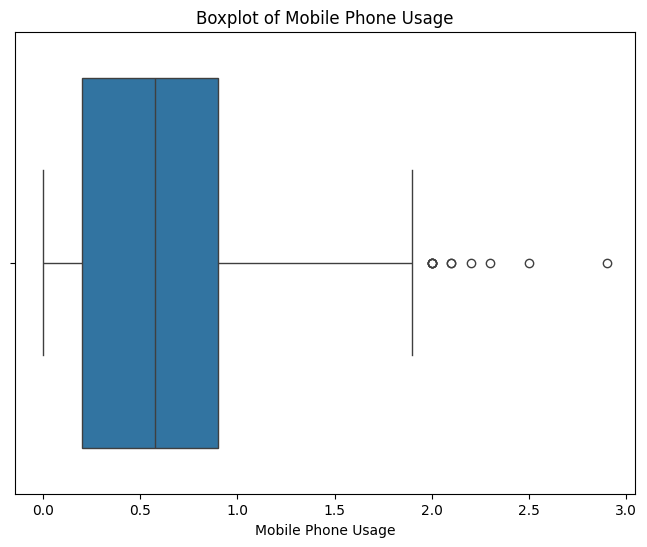

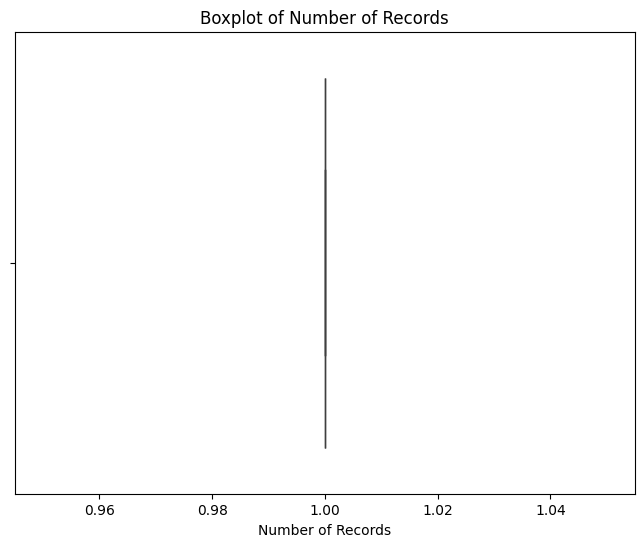

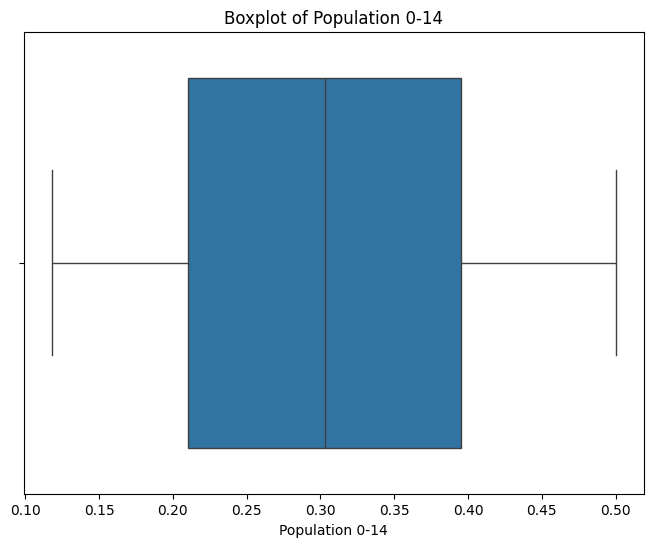

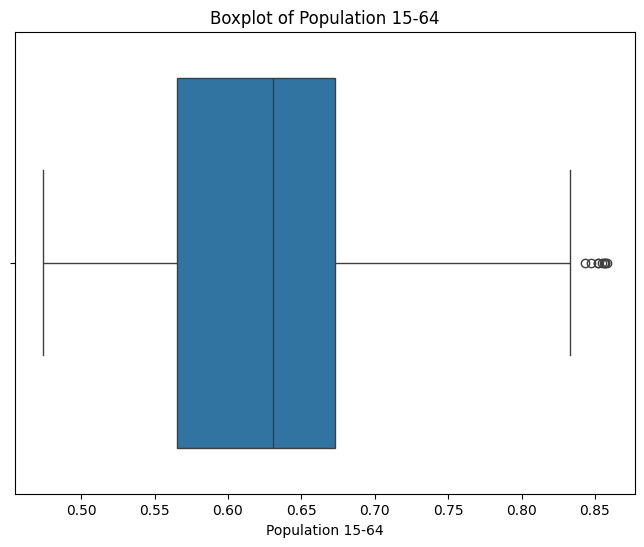

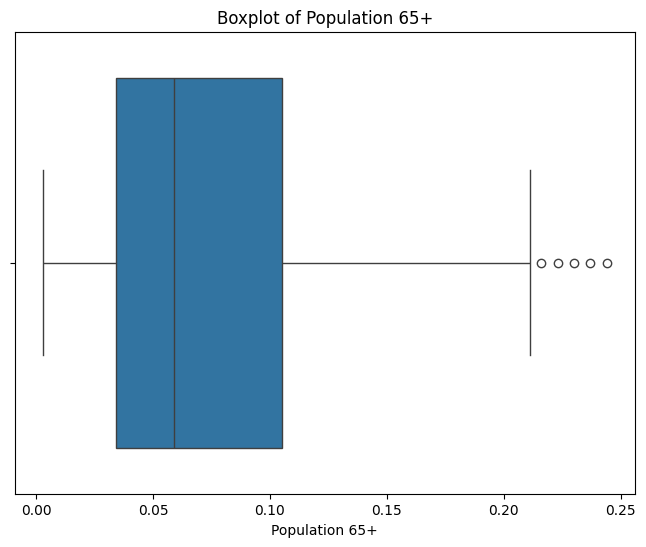

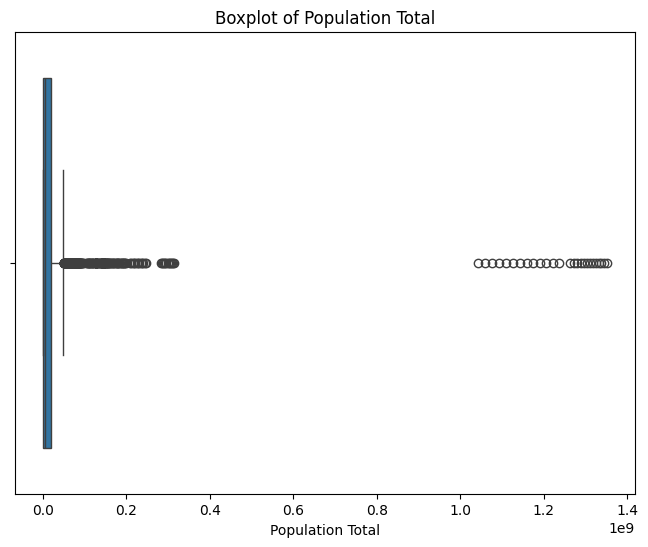

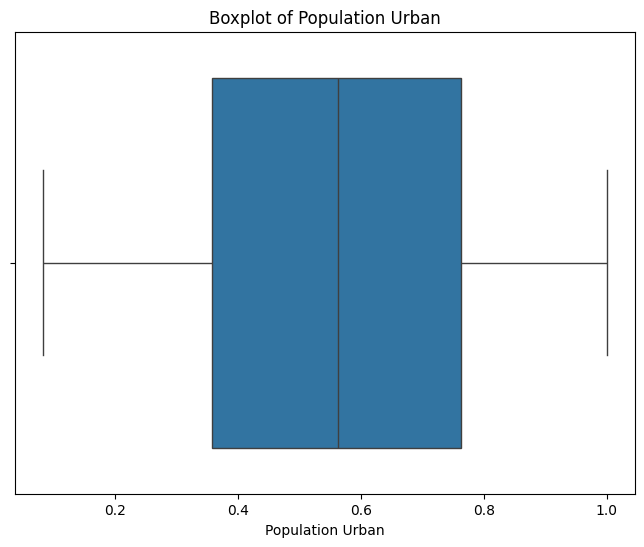

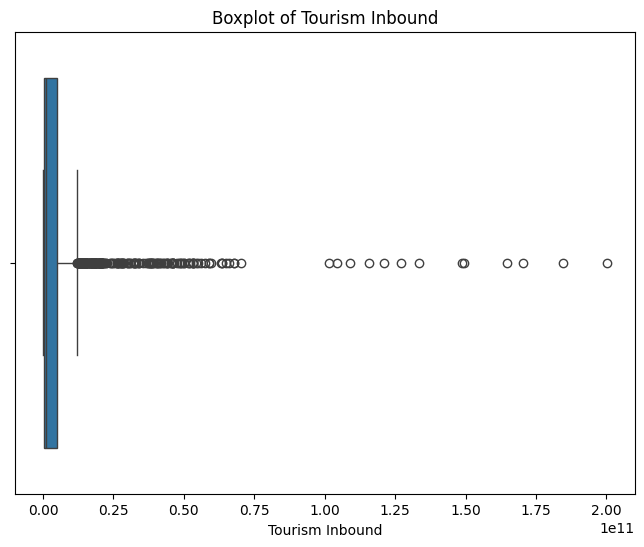

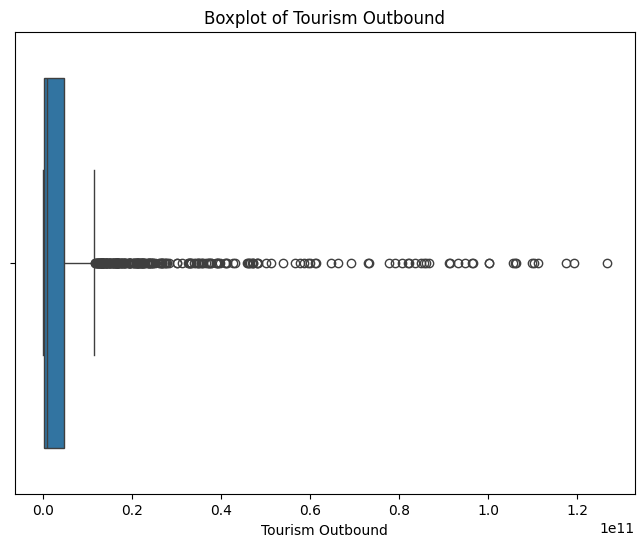

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for each numeric column to identify outliers
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [24]:
df.shape

(2704, 24)

In [25]:
import pandas as pd
import numpy as np

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute Q1, Q3, and IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define extreme outlier threshold (beyond 3*IQR)
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Detect extreme outliers
outliers = ((df_numeric < lower_bound) | (df_numeric > upper_bound))

# Count total extreme outliers
total_outliers = outliers.sum().sum()
print(f"Total extreme outliers detected: {total_outliers}")

# Remove extreme outliers
df_cleaned = df_numeric[~outliers.any(axis=1)]

# Print dataset size before and after
print(f"Original dataset size: {df_numeric.shape[0]}")
print(f"Dataset size after removing extreme outliers: {df_cleaned.shape[0]}")


Total extreme outliers detected: 1586
Original dataset size: 2704
Dataset size after removing extreme outliers: 1825


In [26]:
df=df_cleaned

In [27]:
df.shape

(1825, 23)

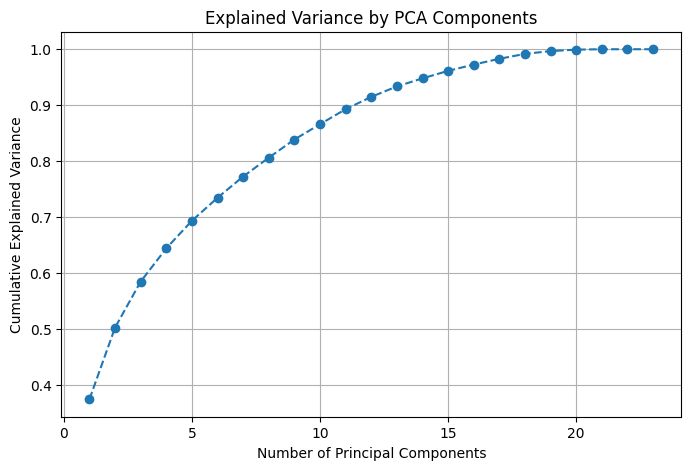

Optimal number of PCA components: 15
Shape of dataset after PCA: (1825, 15)


In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Standardize the data before PCA (Important for better clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Apply PCA
pca = PCA()
df_pca_full = pca.fit_transform(df_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

# Choose number of components that explain ~90-95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1  # First component meeting threshold
print(f"Optimal number of PCA components: {optimal_components}")

# Apply PCA with optimal components
pca = PCA(n_components=optimal_components)
df_pca = pca.fit_transform(df_scaled)

# Print final shape after PCA
print(f"Shape of dataset after PCA: {df_pca.shape}")


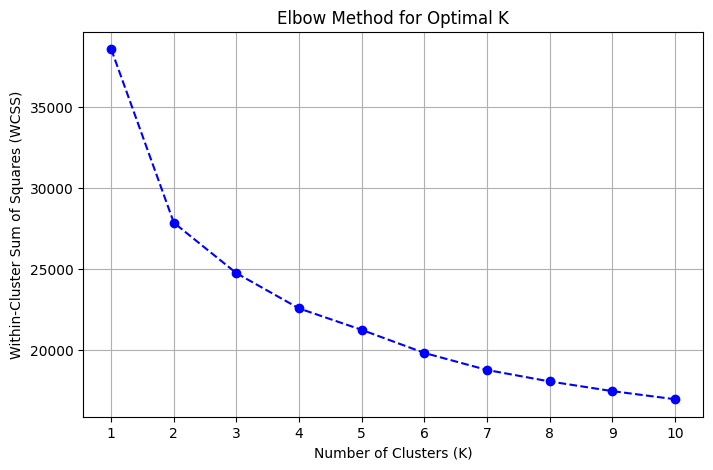

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute WCSS for different K values
wcss = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid()
plt.show()


C:\Users\swath\AppData\Local\Temp\ipykernel_24308\3551250029.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['KMeans_Cluster'] = kmeans.fit_predict(df_pca)


Cluster Distribution:
KMeans_Cluster
1    682
2    678
0    465
Name: count, dtype: int64


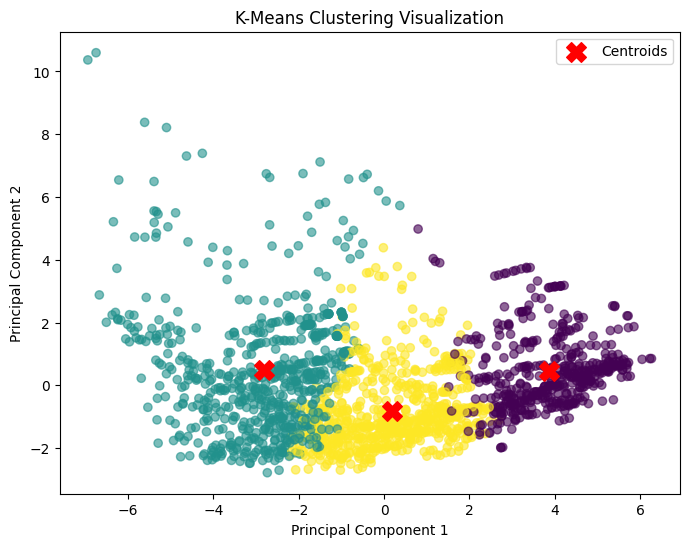

In [30]:
from sklearn.cluster import KMeans

# Set optimal K from the Elbow Method
optimal_k = 3  # Adjust based on elbow method results

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned['KMeans_Cluster'] = kmeans.fit_predict(df_pca)

# Check cluster distribution
print("Cluster Distribution:")
print(df_cleaned['KMeans_Cluster'].value_counts())

# Visualizing clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_cleaned['KMeans_Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization")
plt.legend()
plt.show()


In [31]:
print(df_pca.shape)  # This will show (rows, number of components)


(1825, 15)


In [32]:
columns_pca = [f'PC{i+1}' for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=columns_pca)


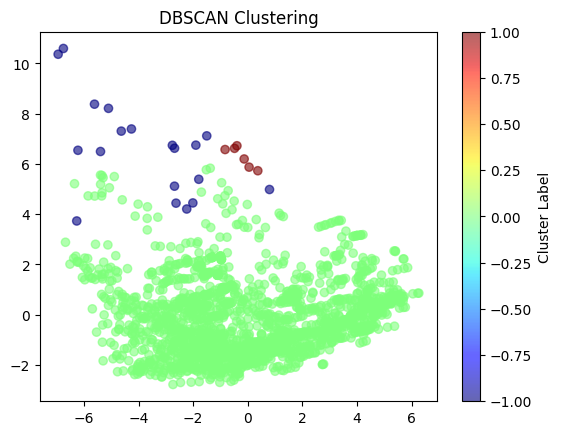

In [33]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
df_pca['DBSCAN_Cluster'] = dbscan.fit_predict(df_pca[['PC1', 'PC2']])

# Visualize DBSCAN Clustering
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['DBSCAN_Cluster'], cmap='jet', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.colorbar(label="Cluster Label")
plt.show()


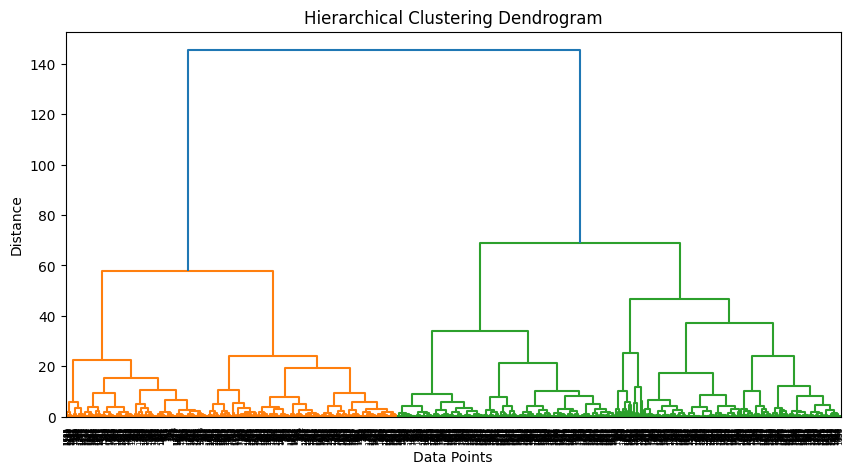

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform Hierarchical Clustering
hierarchy_linkage = linkage(df_pca[['PC1', 'PC2']], method='ward')

# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(hierarchy_linkage)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


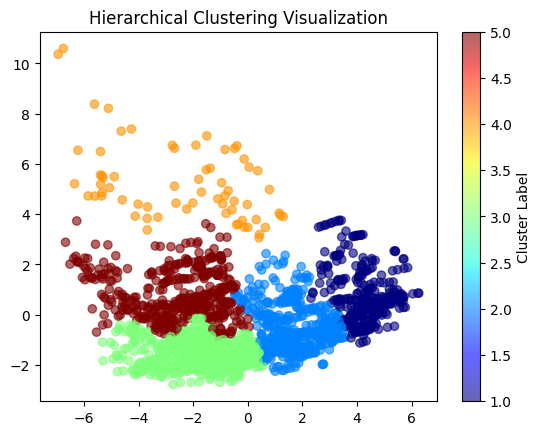

In [35]:
optimal_k = 5  # Change this based on dendrogram observation

# Assign Cluster Labels
df_pca['Hierarchical_Cluster'] = fcluster(hierarchy_linkage, optimal_k, criterion='maxclust')

# Visualize Clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Hierarchical_Cluster'], cmap='jet', alpha=0.6)
plt.title("Hierarchical Clustering Visualization")
plt.colorbar(label="Cluster Label")
plt.show()


In [36]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Compute Silhouette Score
silhouette_hierarchical = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['Hierarchical_Cluster'])
print(f"Silhouette Score (Hierarchical): {silhouette_hierarchical:.4f}")


Silhouette Score (Hierarchical): 0.3554


In [37]:
# Compute Davies-Bouldin Index
db_index_hierarchical = davies_bouldin_score(df_pca[['PC1', 'PC2']], df_pca['Hierarchical_Cluster'])
print(f"Davies-Bouldin Index (Hierarchical): {db_index_hierarchical:.4f}")


Davies-Bouldin Index (Hierarchical): 0.9733


In [38]:
# Compute Calinski-Harabasz Index
ch_index_hierarchical = calinski_harabasz_score(df_pca[['PC1', 'PC2']], df_pca['Hierarchical_Cluster'])
print(f"Calinski-Harabasz Index (Hierarchical): {ch_index_hierarchical:.4f}")


Calinski-Harabasz Index (Hierarchical): 1602.5891


In [39]:
# Compute Evaluation Metrics for DBSCAN
silhouette_dbscan = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['DBSCAN_Cluster'])
db_index_dbscan = davies_bouldin_score(df_pca[['PC1', 'PC2']], df_pca['DBSCAN_Cluster'])
ch_index_dbscan = calinski_harabasz_score(df_pca[['PC1', 'PC2']], df_pca['DBSCAN_Cluster'])

print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.4f}")
print(f"Davies-Bouldin Index (DBSCAN): {db_index_dbscan:.4f}")
print(f"Calinski-Harabasz Index (DBSCAN): {ch_index_dbscan:.4f}")


Silhouette Score (DBSCAN): 0.4016
Davies-Bouldin Index (DBSCAN): 0.8122
Calinski-Harabasz Index (DBSCAN): 64.7038


In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluate K-Means clustering
silhouette_kmeans = silhouette_score(df_pca, df_cleaned['KMeans_Cluster'])
davies_bouldin_kmeans = davies_bouldin_score(df_pca, df_cleaned['KMeans_Cluster'])
calinski_harabasz_kmeans = calinski_harabasz_score(df_pca, df_cleaned['KMeans_Cluster'])

# Print evaluation metrics
print(f"Silhouette Score (K-Means): {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index (K-Means): {davies_bouldin_kmeans:.4f}")
print(f"Calinski-Harabasz Index (K-Means): {calinski_harabasz_kmeans:.4f}")


Silhouette Score (K-Means): 0.1736
Davies-Bouldin Index (K-Means): 1.8149
Calinski-Harabasz Index (K-Means): 570.7878


In [41]:
import pandas as pd

# Create a DataFrame to compare evaluation metrics
comparison_df = pd.DataFrame({
    "Clustering Model": ["K-Means", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [silhouette_kmeans, silhouette_hierarchical, silhouette_dbscan],
    "Davies-Bouldin Index": [davies_bouldin_kmeans, db_index_hierarchical, db_index_dbscan],
    "Calinski-Harabasz Index": [calinski_harabasz_kmeans, ch_index_hierarchical, ch_index_dbscan]
})

# Print the comparison table
print(comparison_df)


  Clustering Model  Silhouette Score  Davies-Bouldin Index  \
0          K-Means          0.173625              1.814852   
1     Hierarchical          0.355420              0.973318   
2           DBSCAN          0.401609              0.812227   

   Calinski-Harabasz Index  
0               570.787814  
1              1602.589139  
2                64.703766  


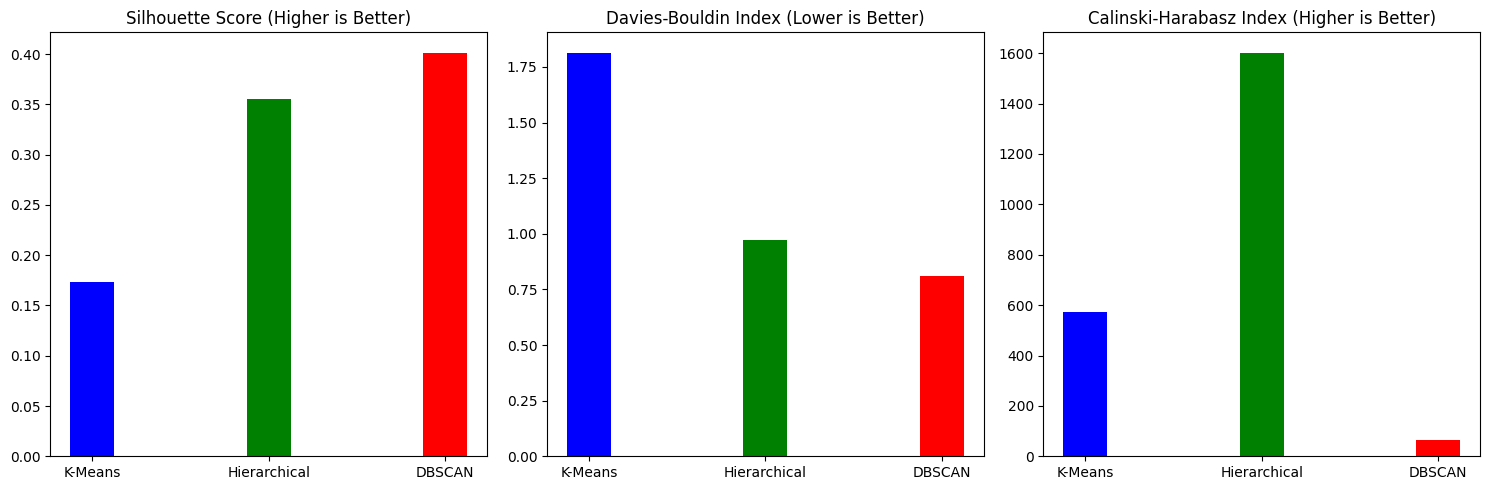

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define models and their scores
models = ["K-Means", "Hierarchical", "DBSCAN"]
silhouette_scores = [silhouette_kmeans, silhouette_hierarchical, silhouette_dbscan]
davies_bouldin_scores = [davies_bouldin_kmeans, db_index_hierarchical, db_index_dbscan]
calinski_harabasz_scores = [calinski_harabasz_kmeans, ch_index_hierarchical, ch_index_dbscan]

# Set bar width
bar_width = 0.25
x = np.arange(len(models))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Silhouette Score Plot
axes[0].bar(x, silhouette_scores, color=['blue', 'green', 'red'], width=bar_width)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_title("Silhouette Score (Higher is Better)")

# Davies-Bouldin Index Plot
axes[1].bar(x, davies_bouldin_scores, color=['blue', 'green', 'red'], width=bar_width)
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_title("Davies-Bouldin Index (Lower is Better)")

# Calinski-Harabasz Index Plot
axes[2].bar(x, calinski_harabasz_scores, color=['blue', 'green', 'red'], width=bar_width)
axes[2].set_xticks(x)
axes[2].set_xticklabels(models)
axes[2].set_title("Calinski-Harabasz Index (Higher is Better)")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



In [43]:
import pickle

In [44]:
with open("hierarchical_model.pkl", "wb") as file:
    pickle.dump(hierarchy_linkage, file)



